In [5]:
import kaplanmeier as km
import pandas as pd

In [8]:
# downloading the data
patients = pd.read_csv('annotation.tsv', sep = '\t')
patients.head()

,ID,Diagnosis,Diagnosis_full,Tissue,Sample Timepoint,OS,OS_FLAG,Cause of death,Age,Gender,...,KRAS_Status_detailed,NRAS_Status,NRAS_Status_detailed,TP53_Status,TP53_Status_detailed,Karyotype,Therapy,Cohort,platform_id,Therapy_detailed
0,#,NaN,NaN,categorical,NaN,NaN,NaN,NaN,categorical,categorical,...,NaN,categorical,NaN,categorical,NaN,NaN,NaN,categorical,categorical,NaN
1,ohsu_635,Acute_Myeloid_Leukemia,AML with Mutated NPM1,BM,Denovo,697.8,1.0,Dead-Disease,55.0,F,...,Negative,WT,Negative,NaN,NaN,"46,XX[20]",Chemotherapy,PUB_AML_Tyner_phs001657,Illumina HiSeq 2500,Standard Chemotherapy|Bone Marrow Transplant
2,ohsu_764,Acute_Myeloid_Leukemia,AML with Mutated NPM1,BM,Denovo,1377.6,0.0,Alive,50.0,F,...,Negative,WT,Negative,NaN,NaN,"46,XX,t(11;17)(q13;q21)[20]",Chemotherapy,PUB_AML_Tyner_phs001657,Illumina HiSeq 2500,Standard Chemotherapy|Bone Marrow Transplant
3,ohsu_923,Acute_Myeloid_Leukemia,AML with Maturation,BM,Denovo,NaN,NaN,NaN,61.0,M,...,NaN,NaN,NaN,NaN,NaN,"46,XY[20]",Chemotherapy,PUB_AML_Tyner_phs001657,Illumina HiSeq 2500,Standard Chemotherapy
4,ohsu_50,Acute_Myeloid_Leukemia,AML with t(6;9)(p23;q34.1);DEK-NUP214,BM,Relapse,1633.2,1.0,Dead-Disease,11.0,M,...,NaN,NaN,NaN,NaN,NaN,"48,X,-Y,+4,t(6;9)(p22;q34),+8,+10,del(15)(q11....",Lymphocyte infusion|Chemotherapy|Targeted therapy,PUB_AML_Tyner_phs001657,Illumina HiSeq 2500,DLI|Standard Chemotherapy|Bone Marrow Transpla...


In [9]:
# deleting the first row as it represents the data type
patients = patients.iloc[1:,]

In [10]:
# keeping only the patients with known overall survival (OS), deleting NANs
patients = patients[(patients.OS_FLAG.notnull()) & (patients.OS.notnull())][['ID','OS', 'OS_FLAG']]

In [11]:
patients # 123 patients left

,ID,OS,OS_FLAG
1,ohsu_635,697.8,1.0
2,ohsu_764,1377.6,0.0
4,ohsu_50,1633.2,1.0
5,ohsu_29,587.1,1.0
6,ohsu_953,1191.0,0.0
...,...,...,...
133,ohsu_4260,535.8,1.0
134,ohsu_4291,120.3,0.0
135,ohsu_4299,299.1,0.0
136,ohsu_4303,27.6,0.0


In [12]:
patients_id = patients.ID.values # writing the IDs in a separate array to select the necessary columns in the expression data 

In [13]:
expressions = pd.read_csv('expressions.tsv', sep = '\t')
expressions

,Gene,ohsu_4310,ohsu_4303,ohsu_4299,ohsu_4291,ohsu_4260,ohsu_4252,ohsu_4239,ohsu_4229,ohsu_4207,...,ohsu_1049,ohsu_1046,ohsu_685,ohsu_1011,ohsu_953,ohsu_29,ohsu_50,ohsu_923,ohsu_764,ohsu_635
0,A1BG,0.000000,0.084965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.183099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005855,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007060,0.000000,0.000000,0.000000
2,A2M,3.098876,0.035833,0.011140,0.279445,0.133723,0.269452,0.026756,0.797005,0.456239,...,4.009333,0.281177,0.166001,0.147095,6.506788,1.749430,0.646265,0.304545,0.000000,0.557590
3,A2ML1,0.703550,0.638242,0.676287,0.851540,0.691908,0.987448,1.128810,0.016766,1.003389,...,0.180517,0.007359,0.542233,0.107143,0.000000,0.000000,0.106870,0.011923,0.000000,0.018612
4,A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.233312,0.158289,0.061786,0.059704,0.067547,0.000000,0.000000,0.068634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20057,ZYG11B,7.151970,8.964519,9.491218,5.686804,11.092956,7.679362,10.574171,5.136377,13.165255,...,11.408389,4.107779,15.583277,10.501023,10.026207,11.044255,10.520502,8.937661,11.580655,17.588949
20058,ZYX,442.874368,719.159638,752.958627,383.558652,443.309995,305.559424,243.208903,520.724900,479.023046,...,264.941504,391.617606,360.684041,260.347936,463.468106,224.940460,340.612618,401.920914,445.868207,623.640761
20059,ZZEF1,9.555652,21.506576,18.672331,15.998032,26.124274,15.502765,13.305092,13.457634,31.968447,...,26.325703,20.036765,31.891758,36.766242,20.919380,10.502105,26.474174,19.563138,21.149728,35.392409
20060,ZZZ3,9.370904,20.593762,17.635945,14.872777,25.337400,22.814244,19.966329,10.887690,12.635568,...,23.021393,12.920426,33.623282,27.562327,26.671237,31.148005,23.804089,13.558837,30.403668,17.431245


In [14]:
# adding Gene column
columns = ['Gene']
columns.extend(list(patients_id))

In [15]:
expressions = expressions.loc[0:len(expressions), columns] # selecting the columns

In [16]:
expressions[expressions['Gene'] == 'PRDM1'].loc[0:len(expressions), patients_id] # selecting the row with the chosen gene

,ohsu_635,ohsu_764,ohsu_50,ohsu_29,ohsu_953,ohsu_685,ohsu_1046,ohsu_1049,ohsu_967,ohsu_1058,...,ohsu_4052,ohsu_4196,ohsu_4207,ohsu_4239,ohsu_4252,ohsu_4260,ohsu_4291,ohsu_4299,ohsu_4303,ohsu_4310
13366,1.522259,1.149615,7.133136,4.181589,3.491239,5.104251,0.963887,1.805202,6.327281,5.93583,...,10.024033,17.802438,8.424466,2.343674,2.92353,2.77225,9.183172,2.842591,0.796401,20.113977


In [17]:
expressions[expressions['Gene'] == 'PRDM1'].loc[0:len(expressions), patients_id].values[0] # proceeding to the expression array

array([ 1.52225889,  1.14961519,  7.13313559,  4.18158854,  3.49123906,
        5.10425098,  0.96388686,  1.80520205,  6.32728145,  5.93582972,
        4.53025796,  6.26858931,  2.18562087,  2.02125037,  2.68691646,
        5.04925264, 10.8345204 , 19.20410045,  7.52485102,  4.13770026,
        7.79995311,  3.83606714,  2.28138735,  4.64577002, 15.54399202,
        8.77708721, 11.06627755,  4.70927059,  1.96835688,  0.86247082,
        2.1965076 ,  6.20206062,  6.8130318 , 10.25321369,  2.24157345,
       10.38831218,  2.82539258,  5.61301636,  0.695001  ,  3.3228774 ,
        1.08094474, 13.48439878,  2.32685378,  3.25752013,  4.33166755,
       13.57974988,  7.91357898,  5.88810284,  2.32508771, 44.23684864,
        2.05116849, 11.67820174, 15.71596793,  1.65143145,  7.74430456,
        6.57100146,  2.17150024, 19.73200195, 40.53338153,  6.80378698,
       25.75108802,  7.76111701,  8.82300164, 48.54855219,  7.30287347,
        3.87403289,  1.91949805, 40.40040357,  2.97472859,  1.88

In [18]:
def km_plot(df, gene, overex):
    
    df[gene] = expressions[expressions['Gene'] == gene].loc[0:len(expressions), patients_id].values[0] # writing into the expression column
    threshold = df[gene].median() # choosing the median as a treshold
    
    # dividing into the groups depending on the expression level
    
    if overex == 1:
        df[gene] = df[gene] >= threshold

    else:
        df[gene] = df[gene] > threshold

    df[gene] = df[gene].astype(int) # converting to a numeric type

    # Data
    time_event = df['OS']
    censoring = df['OS_FLAG']
    y = df[gene]

    #  Compute Survival
    results = km.fit(time_event, censoring, y)

    # Plot
    km.plot(results, cmap='Set2', title = gene)

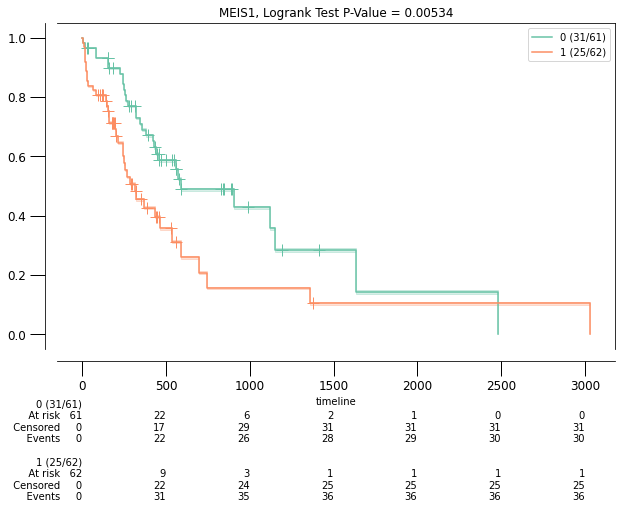

In [19]:
km_plot(patients, 'MEIS1', 1)